<a href="https://colab.research.google.com/github/SuparnoB/Predict_StockPrice_IndianBanks/blob/main/StockPrediction_IndianBanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import datetime
import pandas_datareader as data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

import warnings
import datetime
import pandas_ta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
#Uploading File in coladb
#from google.colab import files
#files.upload()

In [ ]:
#importing librs
s1 = pd.read_csv("AXISBANK.csv")
s2 = pd.read_csv("HDFC.csv")
s3 = pd.read_csv("KOTAKBANK.csv")
s4 = pd. read_csv("ICICIBANK.csv")
s5 = pd.read_csv("SBIN.csv")
idx = pd.read_csv("NIfty.csv")

In [ ]:
# Checking and cleaning the data
s1.shape

(1235, 8)

In [ ]:
s1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Return'],
      dtype='object')

In [ ]:
s1['Return'].unique()

array([ 0.03477405,  0.01101761,  0.00372763, ..., -0.02279734,
        0.00257386, -0.00389704])

In [ ]:
#Droping value
s1.dropna()
s2.dropna()
s3.dropna()
s4.dropna()
s5.dropna()
idx.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,25-10-2021,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,0.000580
1,22-10-2021,18230.699220,18314.250000,18034.349610,18114.900390,18114.900390,324700.0,-0.003477
2,21-10-2021,18382.699220,18384.199220,18048.000000,18178.099610,18178.099610,365900.0,-0.004845
3,20-10-2021,18439.900390,18458.300780,18209.349610,18266.599610,18266.599610,371300.0,-0.008261
4,19-10-2021,18602.349610,18604.449220,18377.699220,18418.750000,18418.750000,368200.0,-0.003155
...,...,...,...,...,...,...,...,...
1229,03-11-2016,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0,-0.003412
1230,02-11-2016,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0,-0.013013
1231,01-11-2016,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0,-0.001360
1232,28-10-2016,8625.000000,8653.750000,8581.750000,8638.000000,8638.000000,175500.0,0.002641


In [ ]:
#decribing the data
s1.describe()


,Open,High,Low,Close,Adj Close,Volume,Return
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1230.000000
mean,600.027454,608.220602,591.080655,599.582685,598.539340,1.338083e+07,0.000691
std,120.662164,120.709162,120.461741,120.765002,121.421485,1.188265e+07,0.023963
min,293.500000,337.500000,286.000000,303.149994,303.149994,1.238680e+06,-0.279108
25%,505.799988,510.950012,499.500000,504.700012,501.889496,6.170479e+06,-0.010987
50%,582.049988,593.950012,568.250000,584.799988,584.074646,9.018273e+06,0.000278
75%,722.000000,733.250000,712.599976,721.950012,721.150024,1.584944e+07,0.011989
max,830.099976,866.900024,825.450012,845.099976,845.099976,9.618623e+07,0.194807


In [ ]:
s2.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1230.000000
mean,1978.685970,2000.266381,1954.604827,1977.614841,1909.743527,3.538645e+06,0.000852
std,387.473668,390.473841,383.202511,387.483571,410.467194,2.087208e+06,0.019180
min,1215.699951,1220.400024,1183.150024,1212.099976,1130.685547,1.198320e+05,-0.132986
25%,1730.000000,1757.000000,1708.300049,1731.650024,1647.856323,2.176046e+06,-0.008824
50%,1909.000000,1927.000000,1884.000000,1906.300049,1823.554688,2.933451e+06,0.000521
75%,2248.850098,2282.000000,2227.399902,2256.250000,2175.840332,4.128459e+06,0.010004
max,2905.000000,2938.350098,2856.250000,2903.949951,2903.949951,1.820364e+07,0.101882


In [ ]:
s3.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1230.000000
mean,1336.733901,1352.303852,1319.278589,1336.453486,1335.259672,3.281591e+06,0.000955
std,341.107671,345.183999,336.442686,340.911421,341.264602,4.052191e+06,0.018318
min,698.000000,702.849976,692.500000,695.599976,694.091003,1.635660e+05,-0.129996
25%,1044.050049,1057.150024,1036.800049,1047.800049,1046.181763,1.621928e+06,-0.008159
50%,1309.800049,1328.849976,1294.349976,1308.550049,1307.295776,2.439933e+06,0.000741
75%,1623.000000,1637.900024,1601.699951,1623.800049,1622.994141,3.837149e+06,0.009350
max,2154.899902,2201.649902,2122.750000,2171.399902,2171.399902,8.385990e+07,0.120510


In [ ]:
s4.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1230.000000
mean,398.647039,403.840073,393.139382,398.629949,394.942415,2.238739e+07,0.001244
std,132.018671,133.220229,130.855090,132.320986,134.275832,1.706091e+07,0.022697
min,226.363632,229.500000,222.727264,225.590912,218.660767,1.114874e+06,-0.178478
25%,296.272736,300.000000,292.250000,296.149994,289.628662,1.248959e+07,-0.010517
50%,356.899994,362.850006,351.600006,356.750000,353.714294,1.793334e+07,-0.000040
75%,483.700012,488.500000,474.299988,483.850006,482.437408,2.664597e+07,0.011904
max,800.000000,867.000000,798.400024,841.700012,841.700012,2.868577e+08,0.146877


In [ ]:
s5.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1230.000000
mean,293.258029,297.244080,288.823195,292.888645,290.250294,3.272043e+07,0.000803
std,65.685227,66.278283,65.099302,65.754694,65.970307,2.642675e+07,0.023750
min,151.949997,153.199997,149.449997,150.850006,149.470016,2.095795e+06,-0.134620
25%,258.000000,261.450012,254.300003,257.500000,254.500320,1.521984e+07,-0.011153
50%,286.649994,289.750000,282.600006,285.899994,282.789124,2.360090e+07,0.000213
75%,320.250000,325.799988,315.549988,319.850006,316.924011,4.237784e+07,0.012296
max,506.500000,515.450012,500.000000,506.500000,506.500000,2.626771e+08,0.276872


In [ ]:
idx.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1.230000e+03,1224.000000
mean,11451.756346,11505.838134,11374.720273,11441.926305,11441.926305,3.979443e+05,0.000654
std,2216.939029,2221.932907,2205.559732,2216.345268,2216.345268,2.358640e+05,0.011516
min,7735.149902,7970.049805,7511.100098,7610.250000,7610.250000,0.000000e+00,-0.129805
25%,10126.050052,10172.637700,10069.412110,10121.824955,10121.824955,2.121250e+05,-0.004222
50%,10933.875005,10991.975100,10854.024905,10940.224610,10940.224610,3.321500e+05,0.000988
75%,11959.524660,12010.787357,11887.799810,11939.487305,11939.487305,5.549500e+05,0.006357
max,18602.349610,18604.449220,18445.300780,18477.050780,18477.050780,1.811000e+06,0.087632


# #Individual graph Price and EMV


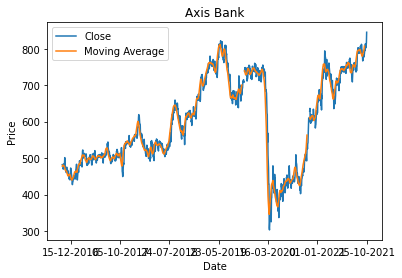

In [ ]:
s1.plot(x = "Date", y = "Adj Close",label = "Close")
plt.plot(s1["Date"],s1["Adj Close"].rolling(window =10).mean(), label = "Moving Average")
plt.rcParams['figure.figsize'] = [20, 7]
plt.gca().invert_xaxis()
plt.title("Axis Bank")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


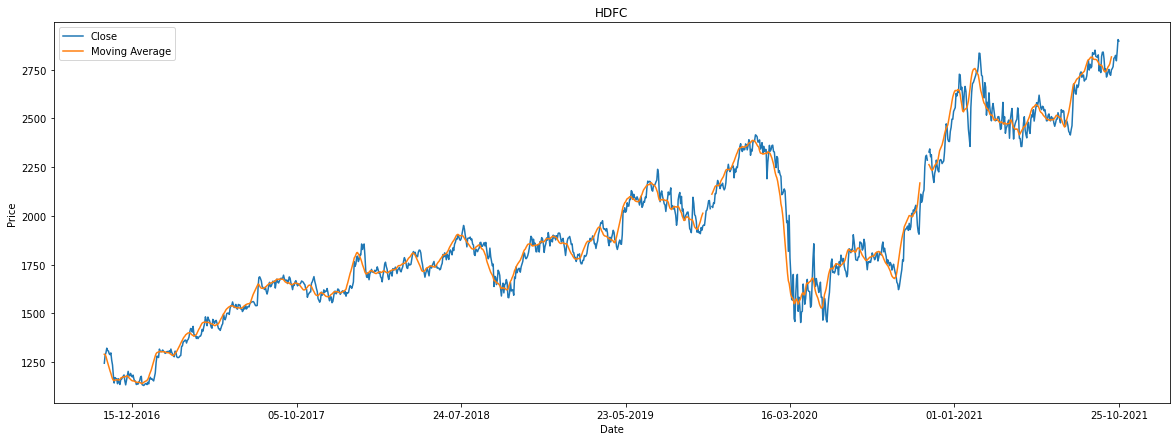

In [ ]:
s2.plot(x = "Date", y = "Adj Close",label = "Close")
plt.plot(s2["Date"],s2["Adj Close"].rolling(window =10).mean(), label = "Moving Average")
plt.gca().invert_xaxis()
plt.title("HDFC")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]

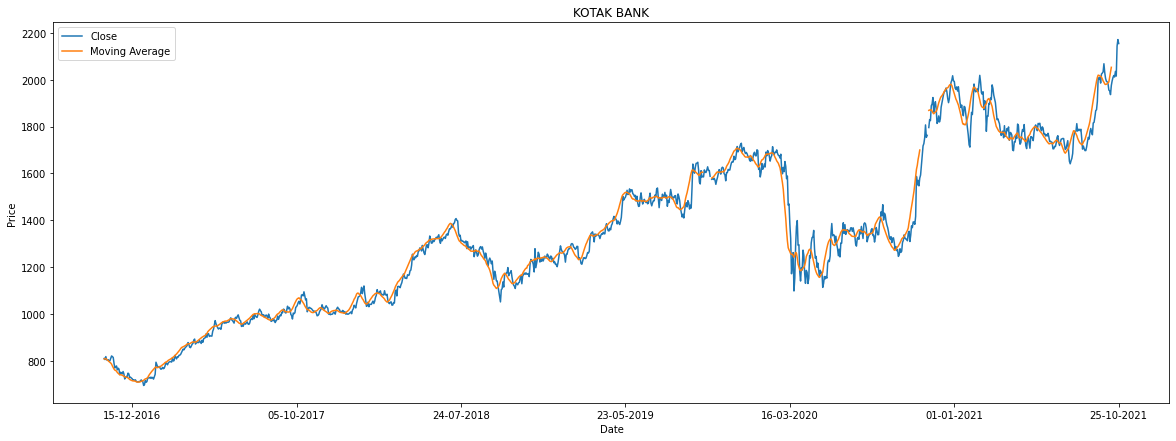

In [ ]:
s3.plot(x = "Date", y = "Adj Close",label = "Close")
plt.plot(s3["Date"],s3["Adj Close"].rolling(window =10).mean(), label = "Moving Average")
plt.gca().invert_xaxis()
plt.title("KOTAK BANK")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]

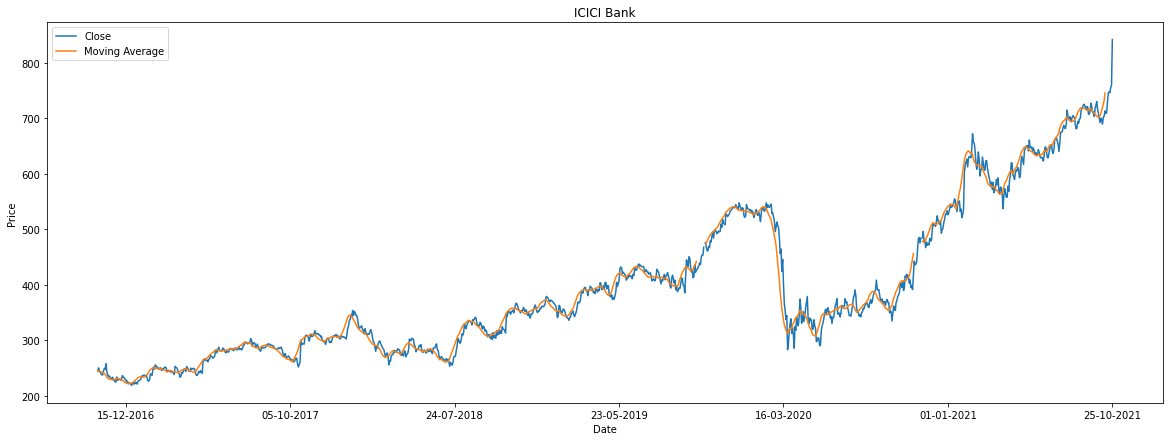

In [ ]:
s4.plot(x = "Date", y = "Adj Close",label = "Close")
plt.plot(s4["Date"],s4["Adj Close"].rolling(window =10).mean(), label = "Moving Average")
plt.gca().invert_xaxis()
plt.title("ICICI Bank")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]

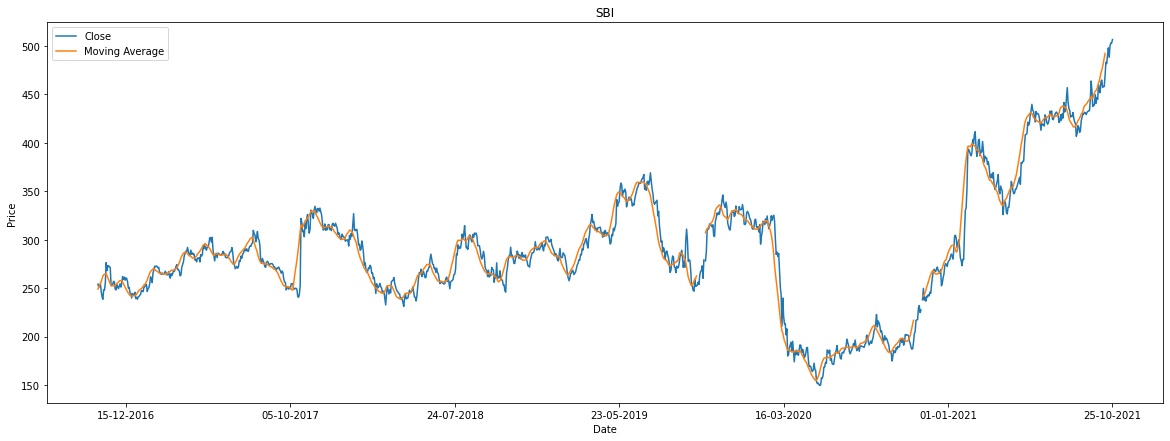

In [ ]:
s5.plot(x = "Date", y = "Adj Close",label = "Close")
plt.plot(s5["Date"],s5["Adj Close"].rolling(window =10).mean(), label = "Moving Average")
plt.gca().invert_xaxis()
plt.title("SBI")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]

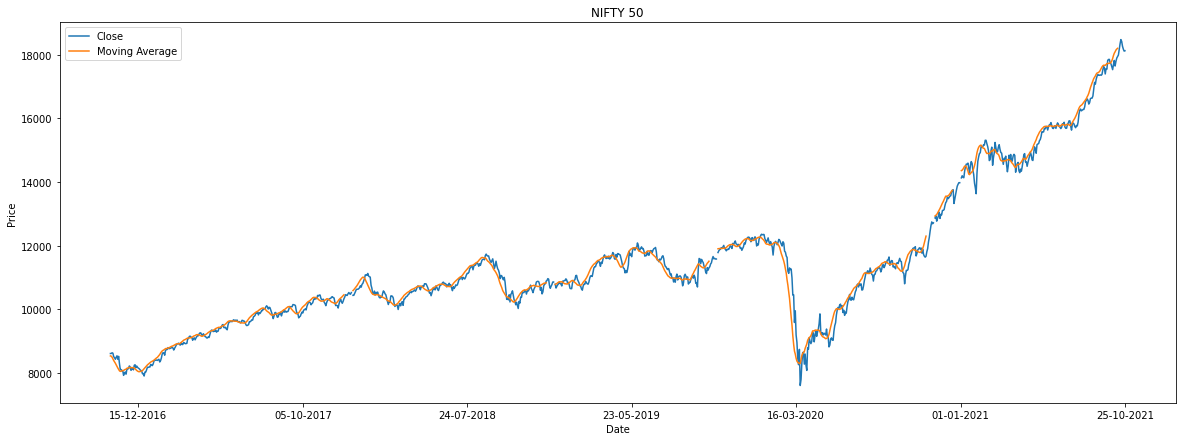

In [ ]:
idx.plot(x = "Date", y = "Adj Close",label = "Close")
plt.plot(idx["Date"],idx["Adj Close"].rolling(window =10).mean(), label = "Moving Average")
plt.gca().invert_xaxis()
plt.title("NIFTY 50")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]


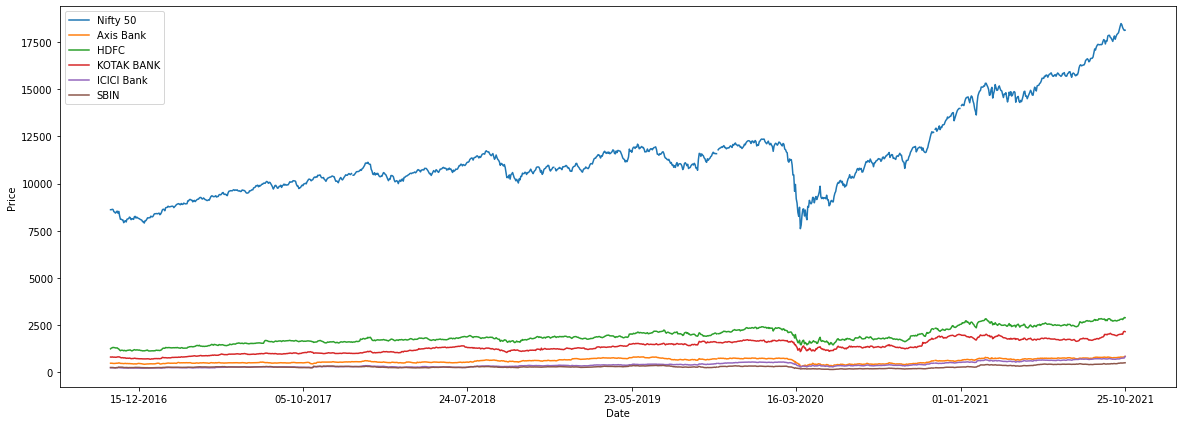

In [ ]:
#Consolidated graph Price
idx.plot(x = "Date", y = "Adj Close",label = "Nifty 50")
plt.plot(s1["Date"],s1["Adj Close"], label = "Axis Bank")
plt.plot(s2["Date"],s2["Adj Close"], label = "HDFC")
plt.plot(s3["Date"],s3["Adj Close"], label = "KOTAK BANK")
plt.plot(s4["Date"],s4["Adj Close"], label = "ICICI Bank")
plt.plot(s5["Date"],s5["Adj Close"], label = "SBIN")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]

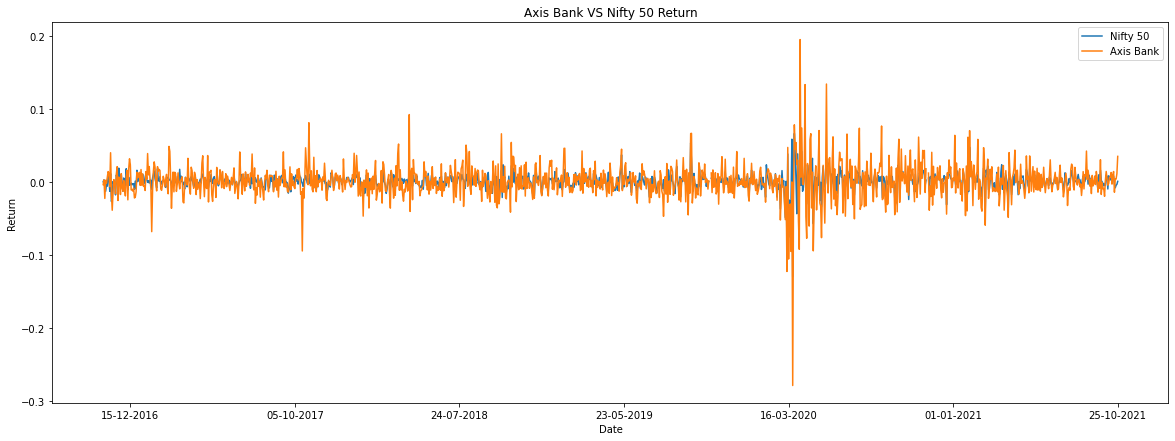

In [ ]:
# Return of Stock
idx.plot(x = "Date", y = "Return",label = "Nifty 50")
plt.plot(s1["Date"],s1["Return"], label = "Axis Bank")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.title("Axis Bank VS Nifty 50 Return")
plt.legend()
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

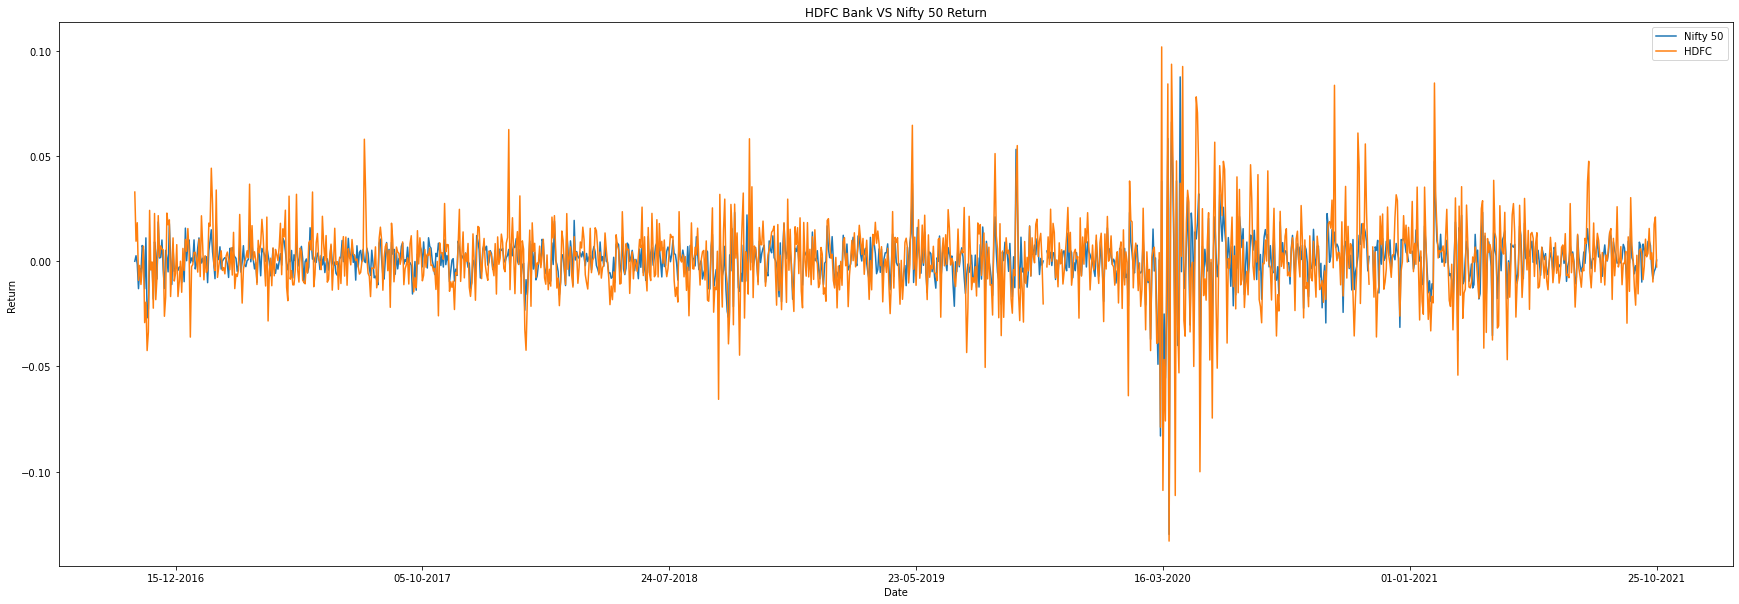

In [ ]:
idx.plot(x = "Date", y = "Return",label = "Nifty 50")
plt.plot(s2["Date"],s2["Return"], label = "HDFC")
plt.gca().invert_xaxis()
plt.rcParams['figure.figsize'] = [20, 7]
plt.xlabel('Date')
plt.ylabel('Return')
plt.title("HDFC Bank VS Nifty 50 Return")
plt.legend()
plt.show()

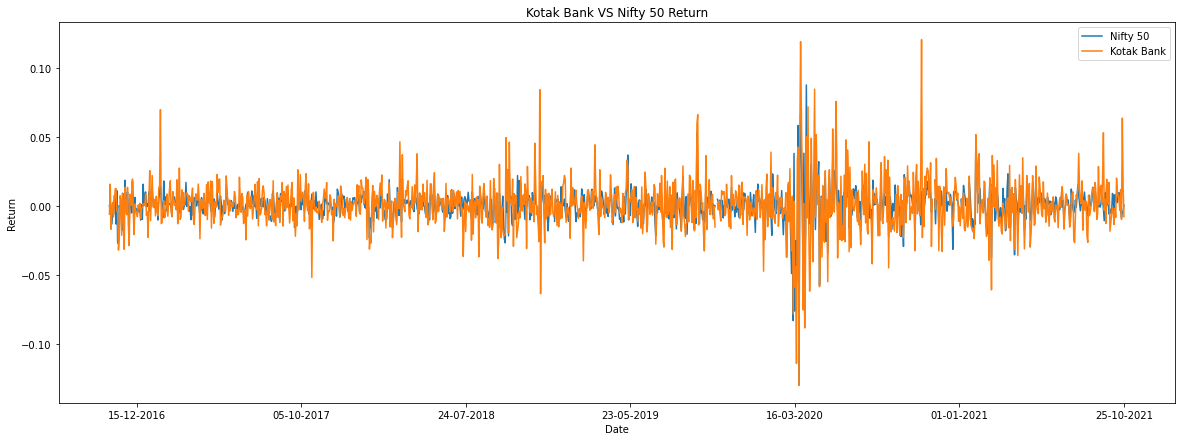

In [ ]:
idx.plot(x = "Date", y = "Return",label = "Nifty 50")
plt.plot(s3["Date"],s3["Return"], label = "Kotak Bank")
#plt.plot(idx["Date"], idx["Return"], label = "Nifty 50")
plt.gca().invert_xaxis()
plt.rcParams['figure.figsize'] = [20, 7]
plt.xlabel('Date')
plt.ylabel('Return')
plt.title("Kotak Bank VS Nifty 50 Return")
plt.legend()
plt.show()

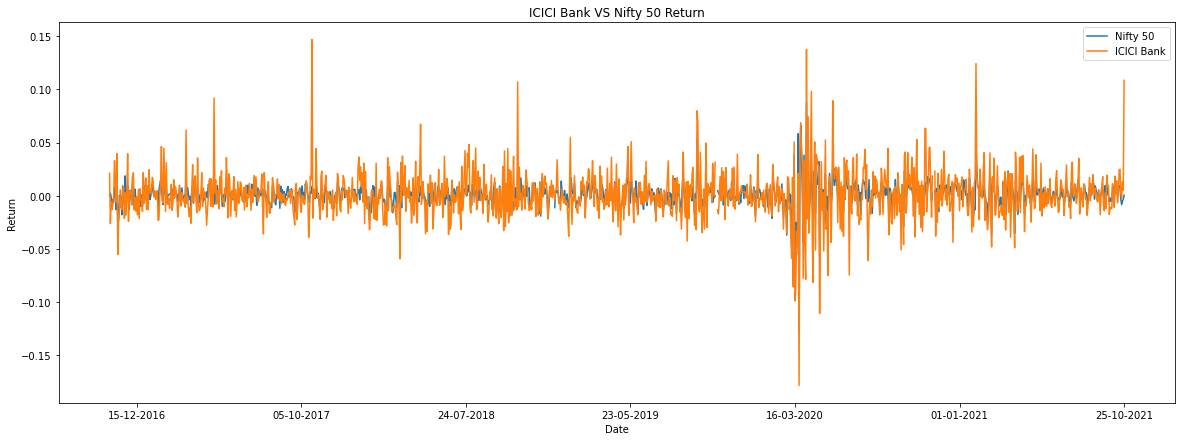

In [ ]:
idx.plot(x = "Date", y = "Return",label = "Nifty 50")
plt.plot(s4["Date"],s4["Return"], label = "ICICI Bank")
#plt.plot(idx["Date"], idx["Return"], label = "Nifty 50")
plt.gca().invert_xaxis()
plt.rcParams['figure.figsize'] = [20, 7]
plt.xlabel('Date')
plt.ylabel('Return')
plt.title("ICICI Bank VS Nifty 50 Return")
plt.legend()
plt.show()

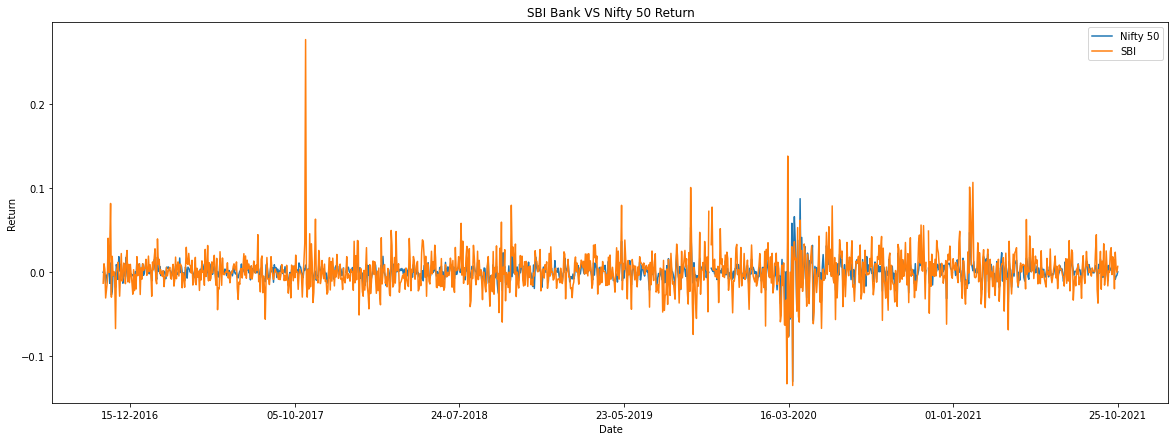

In [ ]:
idx.plot(x = "Date", y = "Return",label = "Nifty 50")
plt.plot(s5["Date"],s5["Return"], label = "SBI")
#plt.plot(idx["Date"], idx["Return"], label = "Nifty 50")
plt.gca().invert_xaxis()
plt.rcParams['figure.figsize'] = [20, 7]
plt.xlabel('Date')
plt.ylabel('Return')
plt.title("SBI Bank VS Nifty 50 Return")
plt.legend()
plt.show()

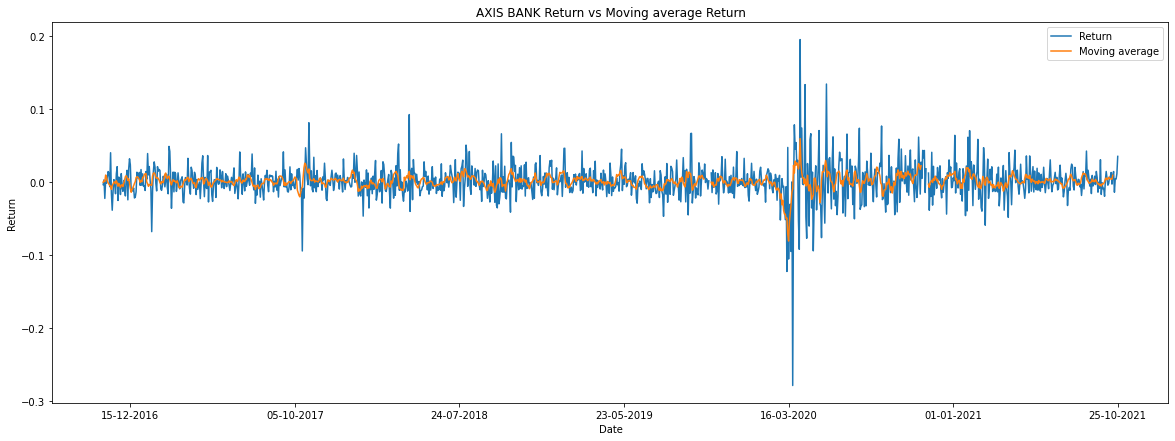

In [ ]:
# Moving average 7 days
s1.plot(x = "Date", y = "Return",label = "Return")
plt.plot(s1["Date"],s1["Return"].rolling(window =7).mean(), label = "Moving average")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.title("AXIS BANK Return vs Moving average Return")
plt.show()

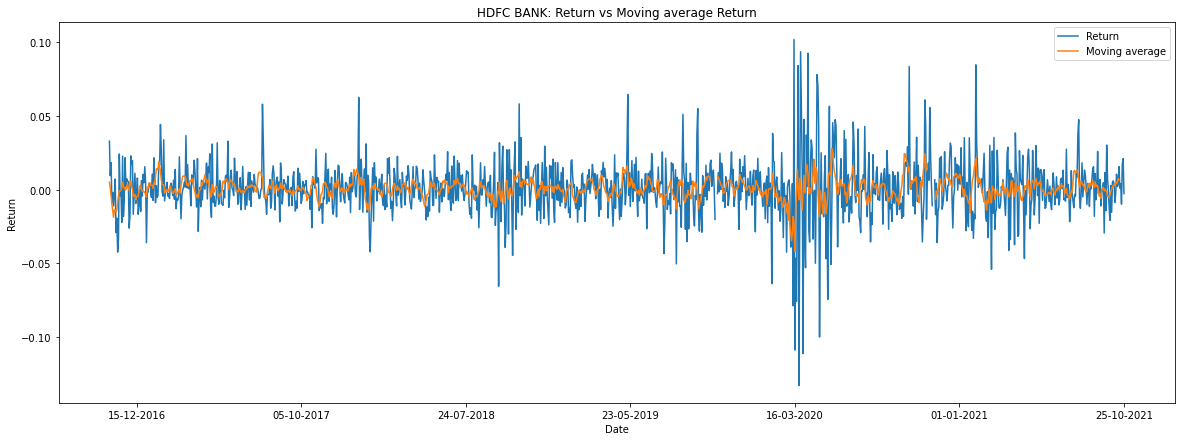

In [ ]:
s2.plot(x = "Date", y = "Return",label = "Return")
plt.plot(s2["Date"],s2["Return"].rolling(window =7).mean(), label = "Moving average")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.title("HDFC BANK: Return vs Moving average Return")
plt.show()

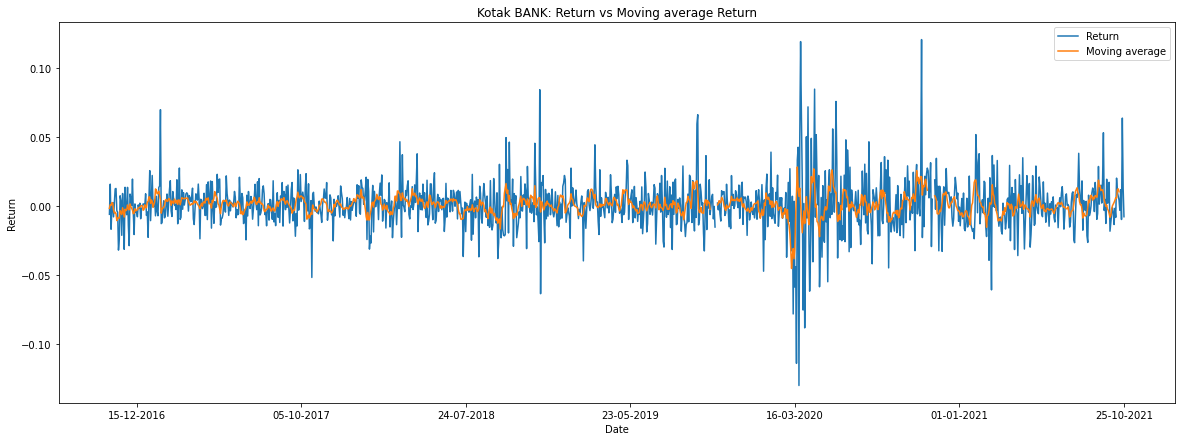

In [ ]:
s3.plot(x = "Date", y = "Return",label = "Return")
plt.plot(s3["Date"],s3["Return"].rolling(window =7).mean(), label = "Moving average")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.title("Kotak BANK: Return vs Moving average Return")
plt.show()

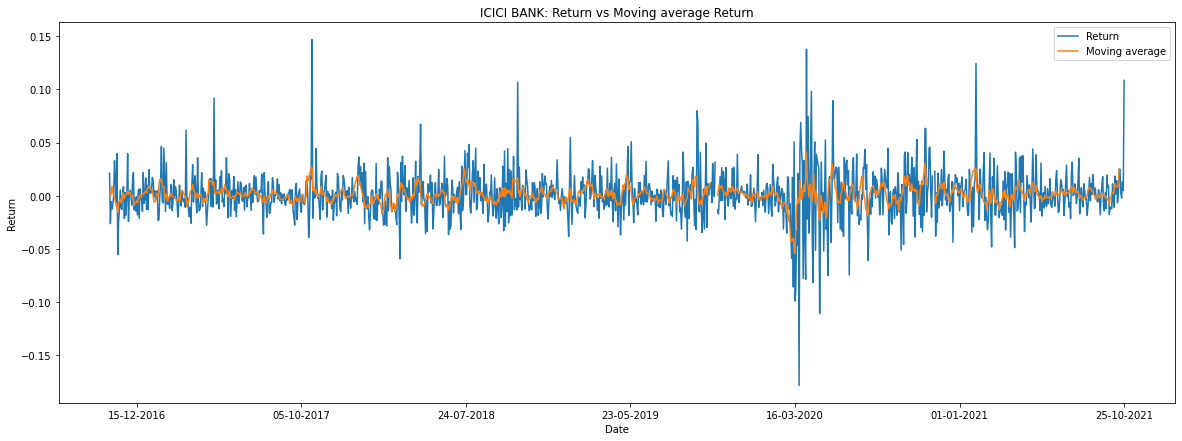

In [ ]:
s4.plot(x = "Date", y = "Return",label = "Return")
plt.plot(s4["Date"],s4["Return"].rolling(window =7).mean(), label = "Moving average")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.title("ICICI BANK: Return vs Moving average Return")
plt.show()

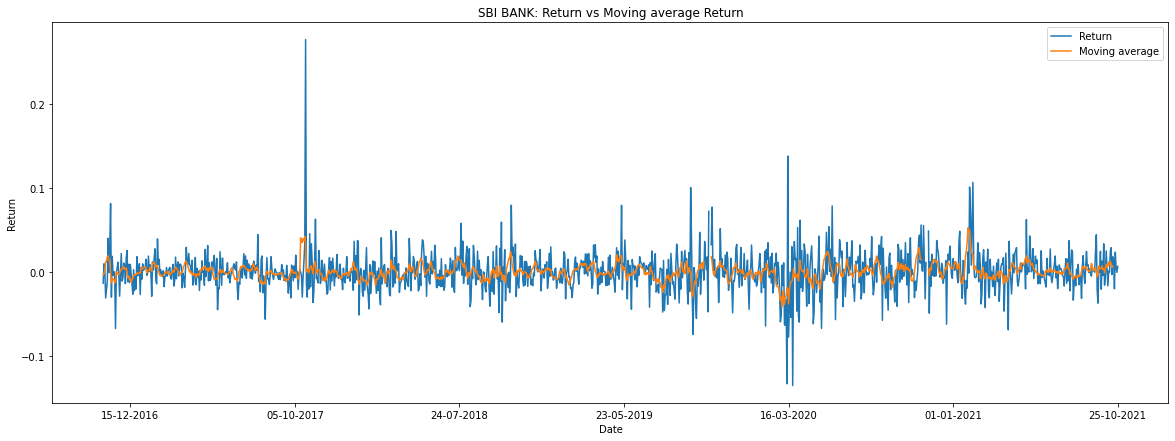

In [ ]:
s5.plot(x = "Date", y = "Return",label = "Return")
plt.plot(s5["Date"],s5["Return"].rolling(window =7).mean(), label = "Moving average")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.title("SBI BANK: Return vs Moving average Return")
plt.show()

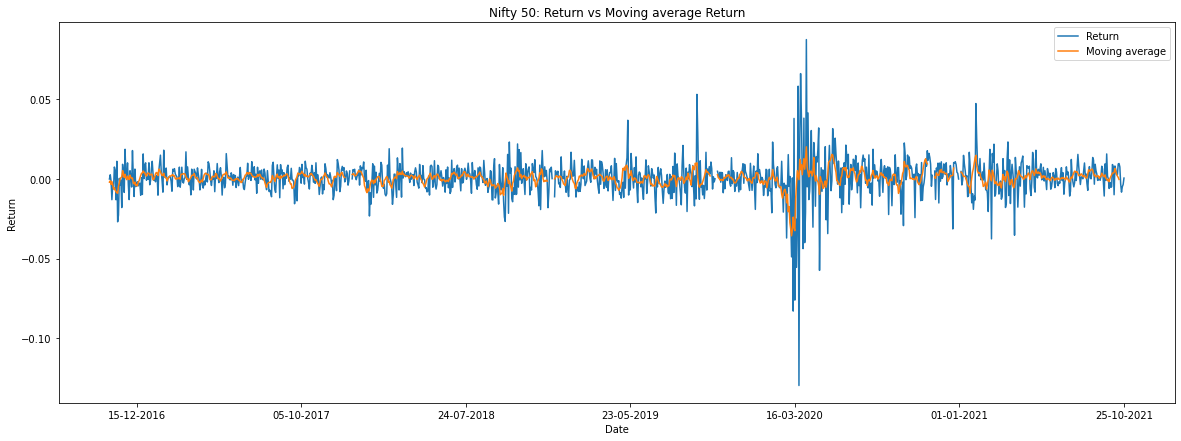

In [ ]:
idx.plot(x = "Date", y = "Return",label = "Return")
plt.plot(idx["Date"],idx["Return"].rolling(window =7).mean(), label = "Moving average")
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.title("Nifty 50: Return vs Moving average Return")
plt.show()

# Statical anaysis of stock

In [ ]:
#merging df
s1 = s1.rename(columns={"Return": "Axis Bank"})

NameError: ignored

In [ ]:
s2 = s2.rename(columns={"Return": "HDFC"})

In [ ]:
s3 = s3.rename(columns={"Return": "Kotak Bank"})

In [ ]:
s4 = s4.rename(columns={"Return": "ICICI Bank"})

In [ ]:
s5 = s5.rename(columns={"Return": "SBI"})

In [ ]:
idx = idx.rename(columns={"Return": "Nifty 50"})

In [ ]:
r1 = pd.concat([s1, s2, s3, s4, s5, idx], axis=1)

In [ ]:
r1.columns

In [ ]:
r2 = r1.drop(columns=["Date", 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [ ]:
r2.dropna()

In [ ]:
#Total Return
r2.sum()*100

In [ ]:
#Average Retun
r2.mean()*100

In [ ]:
#Minmun Return
r2.min()*100

In [ ]:
#Max min return
r2.max()*100

In [ ]:
#Risk assocaite with it
r2.std()

In [ ]:
#The variance of stock returns is a measure of how much a stock’s return varies with respect to its average daily returns
r2.var()*100

In [ ]:
##Covariance indicates how two (or more) variables move together.
#It tells us whether the two variables move together (in which case they share a positive covariance) or they move in the opposite direction (negatively covariance).  
#Covariance in the context of stock market measures how the stock prices of two stocks (or more) move together.  
#The two stocks prices are likely to move in the same direction if they have a positive covariance; likewise, a negative covariance indicates that they two stocks move in opposite direction.
r2.cov()

In [ ]:
#Skewness can either be negative or positive. 
#A stock with negative skewness is one that generates frequent small gains and few extreme or significant losses in the time period considered. 
#On the other hand, a stock with positive skewness is one that generates frequent small losses and few extreme gains.
r2.skew()

#high kurtosis of the return distribution implies the investor will experience occasional extreme returns (either positive or negative), 
#more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns.

In [ ]:

r2.kurt()

In [ ]:
# Statical anaysis of visualtion
plt.plot(r2.mean(), label = "Mean")
plt.xlabel('Stock Name')
plt.ylabel('Mean')
plt.legend()
plt.title("Means of stock")
plt.show()

In [ ]:
sns.distplot(r2.skew())
plt.title('Distribution frequency')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
sns.heatmap(r2.cov(), xticklabels = r2.columns, yticklabels = r2.columns, annot = True)
plt.title('Correlation of Stock and Nifty 50')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Prditicting the stock value

In [ ]:
s1

,Date,Open,High,Low,Close,Adj Close,Volume,Axis Bank
0,25-10-2021,830.099976,866.900024,825.450012,845.099976,845.099976,29193770.0,0.034774
1,22-10-2021,812.000000,825.000000,806.799988,816.700012,816.700012,10646970.0,0.011018
2,21-10-2021,807.950012,813.500000,792.299988,807.799988,807.799988,7405639.0,0.003728
3,20-10-2021,800.599976,813.799988,792.000000,804.799988,804.799988,9023067.0,0.003929
4,19-10-2021,820.000000,827.000000,798.500000,801.650024,801.650024,10633732.0,-0.014324
...,...,...,...,...,...,...,...,...
1230,02-11-2016,469.799988,480.500000,468.100006,476.799988,471.575287,9885845.0,0.002102
1231,01-11-2016,488.049988,488.049988,474.450012,475.799988,470.586243,10425548.0,-0.022797
1232,28-10-2016,486.899994,494.000000,484.549988,486.899994,481.564636,12688495.0,0.002574
1233,27-10-2016,485.000000,489.600006,477.299988,485.649994,480.328339,17198496.0,-0.003897


# Regression Algorithm: Model EMA

In [ ]:
Es1 = s1.ta.ema(close='Adj Close', length=10, append=True)

In [ ]:
Es1.head(10)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9    807.029999
Name: EMA_10, dtype: float64

In [ ]:
Merge_Es1 = pd.concat([s1["Adj Close"],Es1], axis=1) 

In [ ]:
Merge_Es1 = Merge_Es1.dropna()

In [ ]:
Merge_Es1

,Adj Close,EMA_10
9,787.150024,807.029999
10,781.950012,802.470001
11,777.099976,797.857269
12,778.950012,794.419586
13,782.599976,792.270566
...,...,...
1230,471.575287,476.006182
1231,470.586243,475.020738
1232,481.564636,476.210538
1233,480.328339,476.959229


In [ ]:
# Drop the first n-rows
Merge_Es1 = Merge_Es1.iloc[10:]


In [ ]:
Merge_Es1.head(10)

,Adj Close,EMA_10
19,796.950012,786.021519
20,798.049988,788.208513
21,812.150024,792.561515
22,788.349976,791.795781
23,795.349976,792.441998
24,795.849976,793.061631
25,807.349976,795.659512
26,802.599976,796.921414
27,791.400024,795.917525
28,794.400024,795.641616


# With Close Price

In [ ]:

train_x, test_x, train_y, test_y = train_test_split(Merge_Es1[['Adj Close']], Merge_Es1[['EMA_10']], test_size=0.76 , shuffle=False,random_state = 0)

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(291, 1)
(923, 1)
(291, 1)
(923, 1)


In [ ]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [[0.96313002]]
regression intercept [29.27506394]


In [ ]:
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9683109230322875


In [ ]:
predicted=regression.predict(test_x)
test_x.head()

,Adj Close
311,431.549988
312,445.600006
313,460.850006
314,478.950012
315,446.200012


In [ ]:
dfr = pd.DataFrame(columns= {'Actual_Price', 'Predicted_Price'})
dfr ['Actual_Price'] = test_y['EMA_10']
dfr['Predicted_Price'] = predicted

In [ ]:
dfr.head(20)

,Predicted_Price,Actual_Price
311,444.913814,433.929860
312,458.445808,436.051705
313,473.133541,440.560487
314,490.566200,447.540400
315,459.023692,447.296693
316,447.273494,444.879113
317,446.406683,442.737457
318,447.273494,441.148829
319,440.194483,438.512677
320,431.574486,434.728556


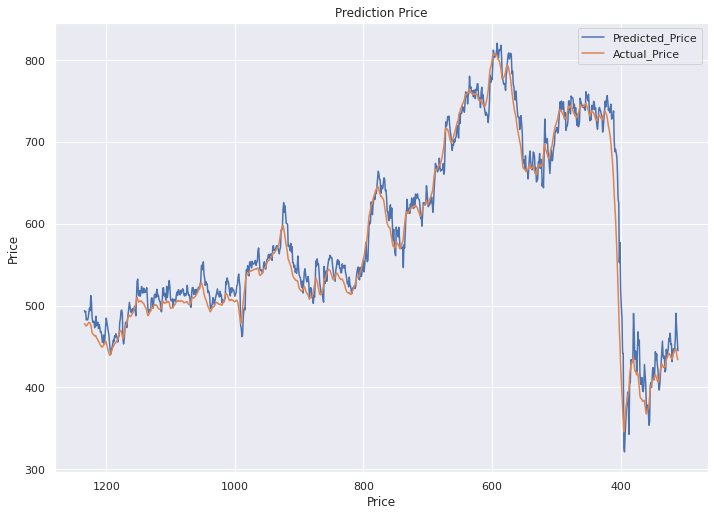

In [ ]:
plt.plot(dfr["Predicted_Price"],label = "Predicted_Price")
plt.plot(dfr["Actual_Price"], label = "Actual_Price")
plt.gca().invert_xaxis()
plt.title("Prediction Price")
plt.xlabel('Price')
plt.ylabel('Price')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 7]

# Model Evalution and  Model Accuracy


Model Evaluation
MAE and RMSE are the most common statistical metrics used to measure continuous variables or in our case the accuracy of our regression models.
The math behind both Models might be confusing or a bit mouthful to absorb its meaning, but think about it in this easy way, We have actual stock close prices and predicted stock prices computed from the same actual stock prices we talked about, now we need to calculate the error or the difference between them to see how accurate these prediction compared to the actual values at hand.

Mean Absolute Error (MAE):
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.

Root mean squared error (RMSE):
RMSE is a quadratic scoring rule that also measures the average magnitude of the error.

Mean squared error (MSE) :
MSE Mean squared error (MSE) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.
All mentioned metrics above can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means the lower values they present the better. Remember that RMSE will always be larger in value than MSE, Also it can penalize more error-related data so RMSE can be a better measure than MSE.

In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

NameError: ignored

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

In [ ]:
plt.plot(dfr.Actual_Price, dfr.Predicted_Price, 'o', color='green')
m, b = np.polyfit(dfr.Actual_Price, dfr.Predicted_Price, 1)
plt.plot(dfr.Actual_Price, m*dfr.Actual_Price+b, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()